In [1]:
import pandas as pd
import treefiles as tf
import seaborn as sns

from anat_db.anat_real import get_pa_fe

pa, fe = get_pa_fe()

In [2]:
import importlib
import anat_db.anat_real as aze
importlib.reload(aze)
from anat_db.anat_real import Manager, lambda_x, boxplot

In [3]:
# for scaler in Manager.SCALERS.keys():
# 	print(f"{scaler:-^30}")
# 	g = Manager(pa, fe, scaler)
# 	g.print_results_ml()

<AxesSubplot:>

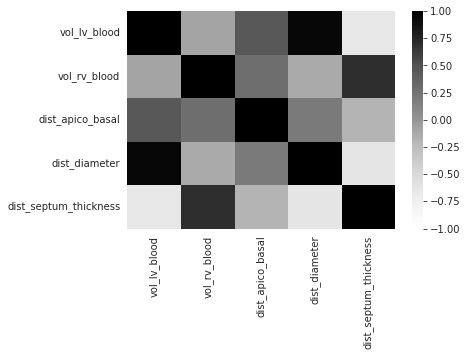

In [4]:
cor = fe.corr()
sns.heatmap(cor, vmin=-1, cmap='Greys')

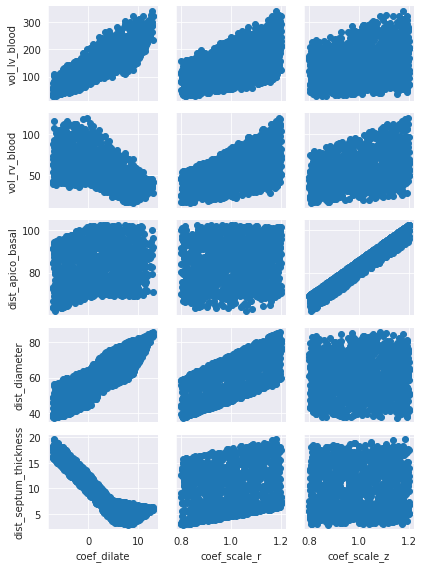

In [5]:
g = Manager(pa, fe, Manager.NOSCALER)
g.plot_values()

                 vol_lv_blood     vol_rv_blood     dist_apico_basal       dist_diameter   dist_septum_thickness 
 ------------   -------------   --------------   ------------------   -----------------   --------------------- 
  coef_dilate   0.77871 (0.0)   -0.68598 (0.0)         0.1934 (0.0)       0.75783 (0.0)           -0.9633 (0.0) 
 coef_scale_r   0.40473 (0.0)    0.64536 (0.0)   -0.01329 (0.64301)       0.49972 (0.0)             0.335 (0.0) 
 coef_scale_z   0.24191 (0.0)    0.31877 (0.0)        0.97041 (0.0)   0.00253 (0.92966)      -0.00151 (0.95792) 



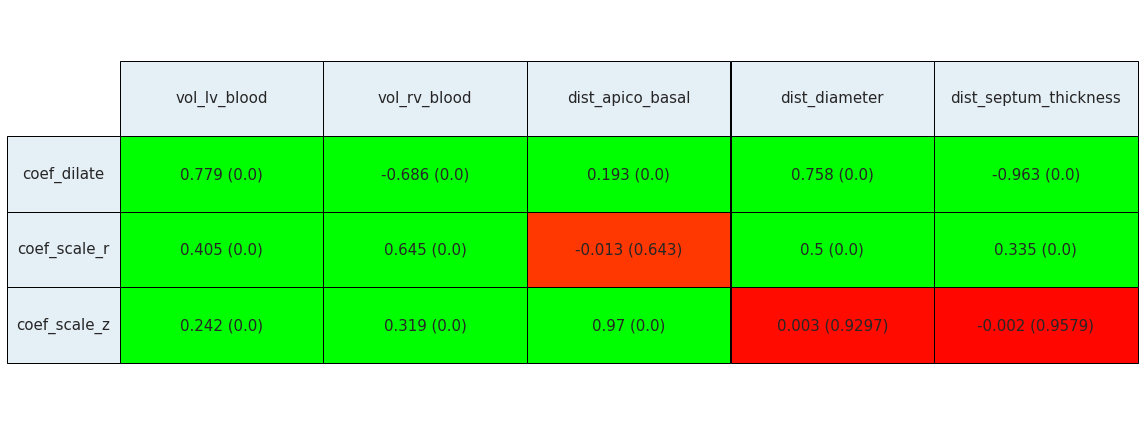

In [6]:
g.plot_sa()

# Testing error


### NoScaler results

In [7]:
g = Manager(pa, fe, Manager.NOSCALER)
plot_data = g.plot_ml_test_resutls()

-------------ridge-------------
MSE train: 0.1301 (0.0010)
MSE test: 0.1357 (0.1918)
r2: 0.9919978456279703
recomputed MSE test: 0.1357 (0.2986)
---------kernel_ridge----------
MSE train: 11.6291 (0.3405)
MSE test: 10.8125 (13.8433)
r2: -54.584098346105016
recomputed MSE test: 10.8125 (23.3504)
--------------knn--------------
MSE train: 0.0733 (0.0155)
MSE test: 0.0482 (0.0675)
r2: 0.9730692428293101
recomputed MSE test: 0.0482 (0.1670)
--------------nn---------------
MSE train: 0.0742 (0.0068)
MSE test: 0.0726 (0.0882)
r2: 0.45373564492630614
recomputed MSE test: 0.0726 (0.1854)


NoScaler


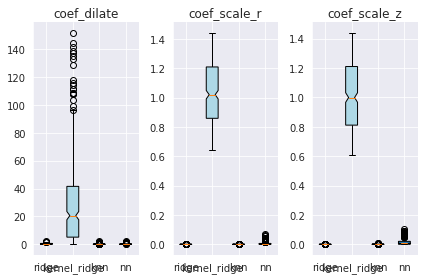

In [8]:
print(Manager.NOSCALER)
boxplot(plot_data, pa.columns)

### MinMaxScaler results

In [9]:
g = Manager(pa, fe, Manager.MINMAXSCALER)
plot_data = g.plot_ml_test_resutls()

-------------ridge-------------
MSE train: 0.1560 (0.0139)
MSE test: 0.1654 (0.2335)
r2: 0.9815712962736026
recomputed MSE test: 0.1654 (0.4259)
---------kernel_ridge----------
MSE train: 0.0627 (0.0037)
MSE test: 0.0360 (0.0498)
r2: 0.9572639998365217
recomputed MSE test: 0.0360 (0.1657)
--------------knn--------------
MSE train: 0.0870 (0.0099)
MSE test: 0.0719 (0.1014)
r2: 0.9888314198145761
recomputed MSE test: 0.0719 (0.2770)
--------------nn---------------
MSE train: 0.0027 (0.0006)
MSE test: 0.0030 (0.0033)
r2: 0.9620781040739107
recomputed MSE test: 0.0030 (0.0066)


MinMaxScaler


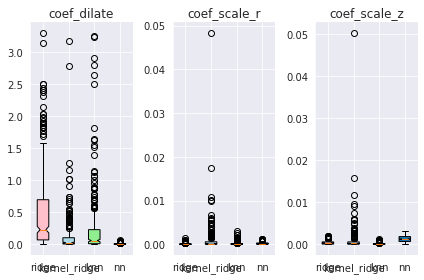

In [10]:
print(Manager.MINMAXSCALER)
boxplot(plot_data, pa.columns)

### StandardScaler results

In [11]:
g = Manager(pa, fe, Manager.STANDARDSCALER)
plot_data = g.plot_ml_test_resutls()

-------------ridge-------------
MSE train: 0.1394 (0.0034)
MSE test: 0.1448 (0.2044)
r2: 0.9790784379742256
recomputed MSE test: 0.1448 (0.3487)
---------kernel_ridge----------
MSE train: 0.6500 (0.1917)
MSE test: 0.2632 (0.3329)
r2: -0.5061599594605992
recomputed MSE test: 0.2632 (1.3748)
--------------knn--------------
MSE train: 0.0721 (0.0053)
MSE test: 0.0604 (0.0852)
r2: 0.9892420908217363
recomputed MSE test: 0.0604 (0.2305)
--------------nn---------------
MSE train: 0.0030 (0.0008)
MSE test: 0.0033 (0.0044)
r2: 0.9912704076252362
recomputed MSE test: 0.0033 (0.0084)


StandardScaler


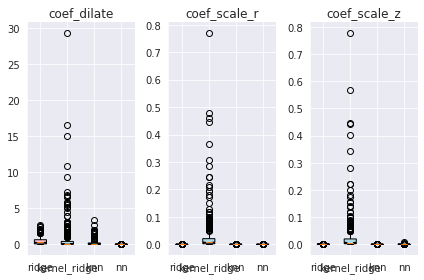

In [12]:
print(Manager.STANDARDSCALER)
boxplot(plot_data, pa.columns)

# Real model prediction error

In [13]:
ddata = []
for scaler in Manager.SCALERS.keys():
	# print(f"{scaler:-^30}")
	g = Manager(pa, fe, scaler)
	results = g.load_result()
	for k,v in results.items():
		# print(f"--> {k}\n{v}")
		for ii in v.columns:
			ddata.append({'scaler':scaler, 'method':k, 'df':v})

In [14]:
df_ = None
print(Manager.NOSCALER)
for x in tf.munchify(tf.query(ddata, scaler=Manager.NOSCALER)):
	if df_ is None:
		df_ = pd.DataFrame(x.df['target'])
	df_[x.method] = x.df['pred']
df_

NoScaler


,target,ridge,knn,nn
vol_lv_blood,130,88.133099,128.772218,101.402804
vol_rv_blood,80,66.790527,78.580615,65.846449
dist_apico_basal,85,81.715775,84.377716,74.378555
dist_diameter,50,50.442358,57.129774,54.801835
dist_septum_thickness,12,13.879871,12.320987,12.414797


In [15]:
df_ = None
print(Manager.MINMAXSCALER)
for x in tf.munchify(tf.query(ddata, scaler=Manager.MINMAXSCALER)):
	if df_ is None:
		df_ = pd.DataFrame(x.df['target'])
	df_[x.method] = x.df['pred']
df_

MinMaxScaler


,target,ridge,kernel_ridge,knn,nn
vol_lv_blood,130,106.175834,115.712884,113.600368,113.220107
vol_rv_blood,80,72.787667,76.576508,75.728022,75.911648
dist_apico_basal,85,86.961151,87.396744,87.155777,88.620712
dist_diameter,50,52.535973,54.025435,53.716948,53.264970
dist_septum_thickness,12,13.144556,12.749390,12.662299,12.712778


In [16]:
df_ = None
print(Manager.STANDARDSCALER)
for x in tf.munchify(tf.query(ddata, scaler=Manager.STANDARDSCALER)):
	if df_ is None:
		df_ = pd.DataFrame(x.df['target'])
	df_[x.method] = x.df['pred']
df_

StandardScaler


,target,ridge,kernel_ridge,knn,nn
vol_lv_blood,130,106.577151,80.863439,119.025622,118.680672
vol_rv_blood,80,75.807903,53.699714,77.246725,79.061257
dist_apico_basal,85,86.936798,77.463348,86.788742,88.439835
dist_diameter,50,52.968826,48.280532,54.851489,54.404322
dist_septum_thickness,12,13.490985,11.645094,12.633870,12.977306


# Additional: grid search

In [17]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import r2_score, mean_squared_error
# import numpy as np
# from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
#
# g = Manager(pa, fe, Manager.MINMAXSCALER)
# x_train, x_test, y_train, y_test, scaler = g.split()
#
# reg_ = KNeighborsRegressor(weights="distance", algorithm="ball_tree", n_neighbors=6)
# cv = RepeatedKFold(n_splits=10, n_repeats=1)
# reg = GridSearchCV(
# 	reg_,
# 	{"n_neighbors": np.linspace(1, 15, 20, dtype=int)},
# 	scoring="neg_mean_squared_error",
# 	cv=cv,
# 	n_jobs=-1,
# )
# reg.fit(x_train, y_train)
# scores = cross_val_score(
# 	reg, x_train, y_train, scoring="neg_mean_squared_error", cv=cv
# )
# scores = np.abs(scores)
# pred = pd.DataFrame(reg.predict(x_test), columns=g.pa.columns)
# test_err = mean_squared_error(y_test, pred, multioutput="raw_values")
#
# dd = {
# 	"scaler": scaler,
# 	# "estimator": reg,
# 	"n_neighbors": reg.best_estimator_.n_neighbors,
# 	"weights": reg.best_estimator_.weights,
# 	"algorithm": reg.best_estimator_.algorithm,
# 	"mse_train": np.mean(scores),
# 	"mse_train_std": np.std(scores),
# 	"mse_test": np.mean(test_err),
# 	"mse_test_std": np.std(test_err),
# 	# "test_samples": (x_test, y_test),
# 	"r2": r2_score(y_test, pred),
# }
# dd

In [18]:
# from sklearn.neural_network import MLPRegressor
#
# cv = RepeatedKFold(n_splits=10, n_repeats=1)
# reg_ = MLPRegressor(max_iter=1000, batch_size=100, learning_rate="adaptive",
# 					hidden_layer_sizes=(50, 100), learning_rate_init=0.01, activation='relu')
# reg = GridSearchCV(
# 	reg_,
# 	# {"hidden_layer_sizes": [(10, 50), (50, 100)],
# 	#  "learning_rate_init": [0.01, 0.005, 0.001],
#     {'activation': ['identity', 'tanh', 'relu']},
# 	scoring="neg_mean_squared_error",
# 	cv=cv,
# 	n_jobs=-1,
# )
# reg.fit(x_train, y_train)
# scores = cross_val_score(
# 	reg, x_train, y_train, scoring="neg_mean_squared_error", cv=cv
# )
# scores = np.abs(scores)
# pred = pd.DataFrame(reg.predict(x_test), columns=g.pa.columns)
# test_err = mean_squared_error(y_test, pred, multioutput="raw_values")
#
# dd = {
# 	"scaler": scaler,
# 	# "estimator": reg,
# 	"hidden_layer_sizes": reg.best_estimator_.hidden_layer_sizes,
# 	"alpha": reg.best_estimator_.alpha,
# 	"learning_rate_init": reg.best_estimator_.learning_rate_init,
# 	"activation": reg.best_estimator_.activation,
# 	"mse_train": np.mean(scores),
# 	"mse_train_std": np.std(scores),
# 	"mse_test": np.mean(test_err),
# 	"mse_test_std": np.std(test_err),
# 	# "test_samples": (x_test, y_test),
# 	"r2": r2_score(y_test, pred),
# }
# dd

In [19]:
# from sklearn.kernel_ridge import KernelRidge
#
# cv = RepeatedKFold(n_splits=10, n_repeats=1)
# reg_ = KernelRidge(kernel='rbf', gamma=2.84)
# reg = GridSearchCV(
# 	reg_,
# 	# {"alpha": np.logspace(-4, 4, 20), "kernel": ["linear", "polynomial", "rbf"]},
#     {"gamma": np.linspace(0, 6, 20)},
#     # {"degree": np.linspace(1, 5, 5)},
# 	scoring="neg_mean_squared_error",
# 	cv=cv,
# 	n_jobs=-1,
# )
# reg.fit(x_train, y_train)
# scores = cross_val_score(
# 	reg, x_train, y_train, scoring="neg_mean_squared_error", cv=cv
# )
# scores = np.abs(scores)
# pred = pd.DataFrame(reg.predict(x_test), columns=g.pa.columns)
# test_err = mean_squared_error(y_test, pred, multioutput="raw_values")
#
# dd = {
# 	"scaler": scaler,
# 	# "estimator": reg,
# 	"gamma": reg.best_estimator_.gamma,
# 	# "degree": reg.best_estimator_.degree,
# 	"kernel": reg.best_estimator_.kernel,
# 	"mse_train": np.mean(scores),
# 	"mse_train_std": np.std(scores),
# 	"mse_test": np.mean(test_err),
# 	"mse_test_std": np.std(test_err),
# 	# "test_samples": (x_test, y_test),
# 	"r2": r2_score(y_test, pred),
# }
# dd